# Checkpoint 3

**Due: Friday, 2 December, 2022 at 5:00pm GMT**

Total points: 100

### Read This First
1. Use the constants provided in the cells. Do not use your own constants.

2. Wherever you see `raise NotImplementedError()`, remove that line and put your code there.

3. Put the code that produces the output for a given task in the cell indicated. You are welcome to add as many cells as you like for imports, function definitions, variables, etc. Do not alter the argument list of functions that are given to you.

4. Your notebook must run correctly when executed once from start to finish. Your notebook will be graded based on how it runs, not how it looks when you submit it. To test this, go to the *Kernel* menu and select *Restart & Run All*.

5. Once you are happy with it, clear the output by selecting *Restart & Clear Output* from the *Kernel* menu.

6. Submit through Noteable.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import time
from scipy.integrate import solve_ivp
from scipy.integrate import solve_bvp
from scipy.signal import find_peaks
from matplotlib import animation
from IPython.display import HTML
import scipy.optimize as scopt
import pandas as pd

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

## Problem 1: the flight of batted baseballs (50 pts)

Batted baseballs experience enough air resistance to alter their paths from a simple parabolic motion. To properly model the flight of a baseball, we must consider the drag force, which is defined as

$
\begin{align}
\large
F_{D} = -\frac{1}{2} C_{D} A \rho v^{2},
\end{align}
$

where $C_{D}$ is the drag coefficient, $A$ is the cross-sectional area of the ball, $\rho$ is the density of air, and $v$ is the velocity of the ball relative to the air. The drag force is oriented opposite to the velocity of the ball.

The system of equations describing the motion of an object experiencing the forces of gravity and air resistance is given by

$
\begin{align}
\large
\frac{dx}{dt} = v_{x}
\end{align}
$

$
\begin{align}
\large
\frac{dy}{dt} = v_{y}
\end{align}
$

$
\begin{align}
\large
\frac{dv_{x}}{dt} = \frac{F_{D_x}}{m}
\end{align}
$

$
\begin{align}
\large
\frac{dv_{y}}{dt} = \frac{F_{D_y}}{m} - g
\end{align}
$

where $F_{D_x}$ and $F_{D_y}$ are the $x$ and $y$ components of the drag force and $m$ is the mass of the ball.

The cell below defines a function describing simple projectile motion without air resistance.

In [3]:
g = 9.80665 # m/s^2
def projectile_motion(t, f):
    """
    f0 = x  => dx/dt  = vx
    f1 = y  => dy/dt  = vy
    f2 = vx => dvx/dt = 0
    f3 = vy => dvy/dt = - g
    """
    
    vals = np.zeros_like(f)
    vals[0] = f[2]
    vals[1] = f[3]
    vals[2] = 0
    vals[3] = - g

    return vals

## Task 1: 20 pts

Compute the motion of a batted ball **experiencing air resistance** under the following conditions.

1. The initial position of the ball is x = 0 m and y = 1 m (the approximate height of a hittable pitch).
2. The initial velocity of the ball is 50 m/s at an angle of 42 degrees with respect to the ground.
3. The ball will land in the seating area beyond the field of play. Nearest to the field, the seats are at a height of 3.5 m up from the ground. The ball should be considered to have landed when it reaches this height (3.5 m).

To do this you must define a new system of equations describing the motion of the ball under gravity and air resistance. You may start with the `projectile_motion` defined function above if you like. The relevant constants are provided in the cell below. Use these in your calculation.

In the cell with `task1`, write a function that returns the time of flight in seconds and the final x displacement of the baseball in meters when it lands in the stands. This function should accept two arguments: the initial speed of the baseball in m/s and the initial angle in degrees. **Do not modify the existing argument list for the `task1` function.** In a subsequent cell, we will call your function with the initial conditions given above. Refer to the testing cell to see how the function will be called.

Your answers must be within 0.1 s and 0.1 m of the correct time and displacement, which are not given.

In [4]:
# baseballs
m = 0.145 # mass in kg
c = 23.2  # circumference in cm
r = c / 2 / np.pi
A = np.pi * (r)**2 / 10000 # m^2
Cd = 0.34

# Earth-related constants
rhoE = 1.18 # air density at sea level kg/m^3
g = 9.80665 # m/s^2

In [5]:
g = 9.80665 # m/s^2

def projectile_motion_drag(t, f):
    
    """
    f0 = x  => dx/dt  = vx
    f1 = y  => dy/dt  = vy
    f2 = vx => dvx/dt = FDx/m
    f3 = vy => dvy/dt = - g + FDy/m
    """
    
    vals = np.zeros_like(f)
    vals[0] = f[2]
    vals[1] = f[3]
    
    v = np.sqrt(f[2]**2 + f[3]**2)
    
    vals[2] = -0.5 * Cd * A * rhoE * (v*f[2])/m
    vals[3] = - g -0.5 * Cd * A * rhoE * (v*f[3])/m

    return vals

In [6]:
#Sets condition when the ball is at the seats 

def atseats(t, f):
    return f[1] - 3.5

atseats.terminal = True
atseats.direction = -1

In [7]:
def task1(vi, theta):
    
    
    theta = np.radians(theta)
    
    #Initial conditions
    ti, tf = (0, 20)
    init_cons = 0, 1, vi*np.cos(theta), vi*np.sin(theta)  
    
    #solve the system of equations
    sol = solve_ivp(projectile_motion_drag, (ti, tf), init_cons, events = (atseats), dense_output = True)
    
    #Time when the ball reaches the seats
    time_taken = sol.t_events[0][0]
    
    #Solves the system at time values my_t
    my_t = np.linspace(0, time_taken, 1000)
    my_sol = sol.sol(my_t)
    
    #Last x position of the ball
    max_x = my_sol[0].max()
    
    return time_taken, max_x

In [8]:
vi = 50 # m/s
theta = 42 # degrees

tfinal1, xfinal1 = task1(vi, theta)
print (f"Flight time: {tfinal1} s.")
print (f"Final x displacement: {xfinal1} m.")

# We will test against the correct answer.


Flight time: 5.411659251108142 s.
Final x displacement: 126.24741216058064 m.


## Task 2: 20 pts

Can you hit a ball that will land in the same spot in half the time?

In the cell below with `task2`, write a function that computes the initial speed and angle required for a ball to land in the same spot as in Task 1. This function should accept a single argument, the desired flight time in seconds. **Do not modify the argument list of `task2`.** The function should return the initial speed in m/s and initial angle in degrees. Refer to the testing cell below to see how the function will be called and tested. Your answer should result in a flight time that is half of the flight time from task 1 to within 1%.

In [9]:
g = 9.80665 # m/s^2

def derivatives(t, f):
    
    """
    f0 = x  => dx/dt  = vx
    f1 = y  => dy/dt  = vy
    f2 = vx => dvx/dt = FDx/m
    f3 = vy => dvy/dt = - g + FDy/m
    """
    
    vals = np.zeros_like(f)
    vals[0] = f[2]
    vals[1] = f[3]
    
    v = np.sqrt(f[2]**2 + f[3]**2)
    
    vals[2] = -0.5 * Cd * A * rhoE * (v*f[2])/m
    vals[3] = - g -0.5 * Cd * A * rhoE * (v*f[3])/m

    return np.vstack(vals)
    
def bc(start, end):
    
    """
    start is [xi, yi, vxi, vyi] on the left
    end is [xf, yf, vxf, vyf] on the right
    """
    
    return np.array([start[0], start[1] - 1, end[0] - xfinal1, end[1] - 3.5])



In [10]:
def task2(tflight):
    
    #time values
    
    t = np.linspace(0, tflight, 1000)
    
    #Guess of values of function at t values
    f = np.zeros((4, t.size))
    f[0] = 0
    f[1] = 1
    f[2] = 10
    f[3] = 10

    #Solution to set of equations
    sol = solve_bvp(derivatives, bc, t, f, verbose = 2)

    #Solve the equations at t values
    solution = sol.sol(t)
    
    #Calculates and returns initial velocity and angle
    vxi = solution[2][0]
    vyi = solution[3][0]
    v_initial = np.sqrt(vxi**2 + vyi**2)
    angle = np.arctan(vyi/vxi)*180/np.pi
    
    return v_initial, angle

In [11]:
factor = 2
my_vi, my_angle = task2(tfinal1 / factor)
print (f"Initial velocity: {my_vi} m/s, angle: {my_angle} degrees.")

tfinal2, xfinal2 = task1(my_vi, my_angle)
print (f"Flight time: {tfinal2} s.")
print (f"Final x displacement: {xfinal2} m.")

print (f"Task1 flight time: {tfinal1} s, task2 flight time: {tfinal2} s, ratio: {tfinal1/tfinal2}")
diff = np.abs(factor - tfinal1/tfinal2)
print (f"{diff=}")
assert diff < 0.01 * factor

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          9.86e-06       1.26e-18         1000             0       
Solved in 1 iterations, number of nodes 1000. 
Maximum relative residual: 9.86e-06 
Maximum boundary residual: 1.26e-18
Initial velocity: 71.8609557010422 m/s, angle: 13.784485307636684 degrees.
Flight time: 2.7062020012534065 s.
Final x displacement: 126.27077739825809 m.
Task1 flight time: 5.411659251108142 s, task2 flight time: 2.7062020012534065 s, ratio: 1.999724798297272
diff=0.00027520170272810063


## Task 3: 10 pts

Make an animation showing the flight of both baseballs (i.e., x displacement on x axis and y displacement on y axis). Time it so the slower ball launches first, followed by the faster ball, and they land at the same time.

The axes function `ax.set_aspect('equal')` (for a given axes object called `ax`) can be used to make distances the same on the x and y axes.

   Iteration    Max residual  Max BC residual  Total nodes    Nodes added  
       1          9.86e-06       1.26e-18         1000             0       
Solved in 1 iterations, number of nodes 1000. 
Maximum relative residual: 9.86e-06 
Maximum boundary residual: 1.26e-18


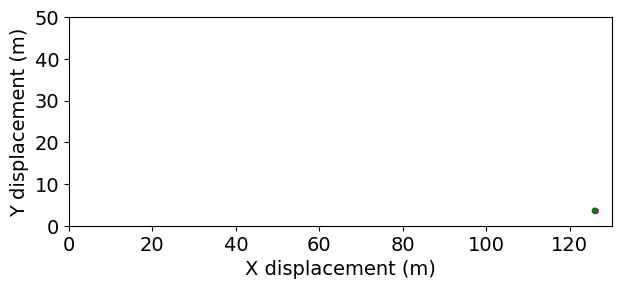

In [12]:
#Creates figure for animation
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(7, 6.5)
ax = plt.axes(xlim=(0, 130), ylim=(0, 50))
ax.set_aspect('equal')
ax.set_xlabel('X displacement (m)')
ax.set_ylabel('Y displacement (m)')

#Creates the two balls
ball1 = plt.Circle((5, -5), 0.75, fc='magenta')
ball2 = plt.Circle((5, -5), 0.75, fc='green')

#Recreates solution from task 1
vi = 50
theta = 42
theta = np.radians(theta)
ti, tf = (0, 20)
init_cons = 0, 1, vi*np.cos(theta), vi*np.sin(theta) 
sol1 = solve_ivp(projectile_motion_drag, (ti, tf), init_cons, events = (atseats), dense_output = True)

#Recreates solution from task 2
t = np.linspace(0, tfinal1/2, 1000)
f = np.zeros((4, t.size))
f[0] = 0
f[1] = 1
f[2] = 10
f[3] = 10
sol2 = solve_bvp(derivatives, bc, t, f, verbose = 2)

#Number of frames
N = 360

def init():
    
    #Initialises ball objects
    ball1.center = (0, 1)
    ax.add_patch(ball1)
    
    ball2.center = (0, 1)
    ax.add_patch(ball2)
    
    return ball1, ball2

def animate(i):
    
    #Times at which to solve for ball positions
    times = np.linspace(0, sol1.t_events[0][0], N)
    
    #Updates ball position
    x, y = ball1.center    
    solution = sol1.sol(times[i])
    x = solution[0]
    y = solution[1]
    ball1.center = (x, y)
    
    #Condition so that ball 2 starts later and both balls land at same time
    if i > N/2:
    
        x2, y2 = ball2.center
        solution2 = sol2.sol(times[i - int(N/2)])
        x2 = solution2[0]
        y2 = solution2[1]
        ball2.center = (x2, y2)
    
    
    return ball1, ball2

#Runs animation
anim = animation.FuncAnimation(fig, animate, 
                               init_func=init, 
                               frames=N, 
                               interval=20,
                               blit=True)
HTML(anim.to_jshtml())

## Problem 2: harmonics of the square wave (25 pts)

A square wave is composed of a fundamental tone (at wavenumber $\omega=1$) and a series of harmonics at odd wavenumbers. The amplitudes of the harmonics obey the following relation:

$
\begin{align}
\large
\frac{|c_k(\omega=3,5,7,...)|}{|c_k(\omega=1)|} \propto \omega^{\alpha},
\end{align}
$

where $c_k(\omega)$ are the Fourier coefficients as a function of wavenumber of the square wave and $\alpha$ is a constant. $c_k(\omega=1)$ is the Fourier coefficient of the fundamental tone, i.e., at $\omega=1$.

In the cell below, you are given a square wave signal.

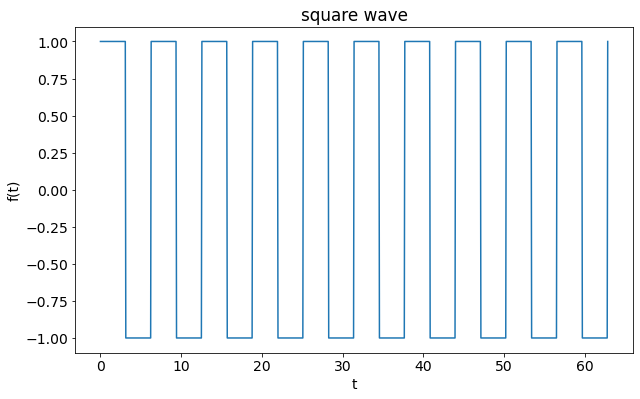

In [13]:
from scipy import signal

tsqu = np.linspace(0, 20*np.pi, 1001)
ysqu = signal.square(tsqu)

plt.plot(tsqu, ysqu)
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('square wave')
plt.show()

## Task 1: 20 pts

In the cell below, use the square wave signal define above to calculate the value of $\alpha$ from the previous expression. Do this by taking the FFT of the signal, locating the peaks at the harmonics, and fitting a curve to them. Do this in the cell below. Your code should print out the value of $\alpha$ and be within 1% of the correct answer.

You may find the `scipy.signal.find_peaks` function useful.

In [14]:
def func(x, B, a):
    
    """
    Function for curve fit 
    """
    
    return B*x**a

In [15]:
#Foruier transform
ck = np.fft.rfft(ysqu)

#Creates array of wave numbers
tmax = tsqu.max()
wn = (2 * np.pi / tmax) * np.arange(ck.size)

#Finds the peaks 
peak_locs = find_peaks(abs(ck))[0]
peaks = abs(ck[peak_locs])

#Uses curve fit to calculate the function describing the amplitudes
fitp, fitcov = scopt.curve_fit(func, wn[peak_locs], peaks, p0=(1,2))

#Prints estimate of alpha value
print ("alpha = " + str(fitp[1]))

alpha = -0.9999556218727563


## Task 2: 5 pts

Plot the amplitude spectrum of the square wave signal vs. wavenumber, $\omega$. This should show the harmonics occuring at odd values of $\omega$, i.e., 1, 3, 5, 7... Include on the plot the locations of the harmonics, denoted by circles. Plot a curve that fits $\omega$ and amplitude of the harmonics. Plot this in log-log to better illustrate the relation between $\omega$ and amplitude. Include all appropriate labels, legends, etc.

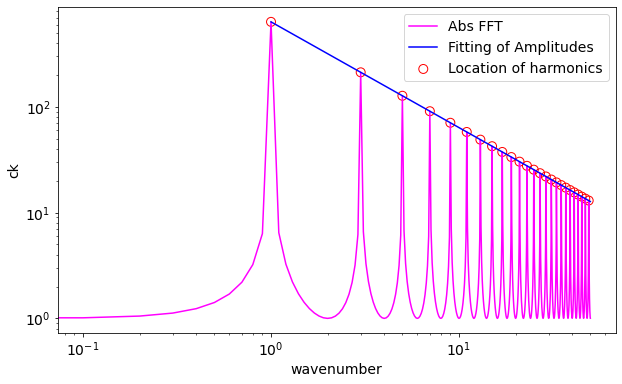

In [16]:
plt.loglog(wn, np.abs(ck), color = 'Magenta', label = 'Abs FFT')
x = np.linspace(1, 50, 1000)

plt.loglog(x, func(x, *fitp), color = 'Blue', label = 'Fitting of Amplitudes')
plt.xlabel('wavenumber')
plt.ylabel('ck')
plt.scatter(wn[peak_locs], peaks, s=80, facecolors='none', edgecolors='r', label = 'Location of harmonics')
plt.legend();

## Problem 3: the solar cycle (25 pts)

The number of sunspots visible on the Sun is known to have cyclic behavior. The data file, "sunspots.txt" (included with the checkpoint), contains counts of the number of sunspots per month since 1749. The data contains two columns:
1. the time in years denoting the mid-point of the month
2. the number of sunspots observed in that month

## Task 1: 10 pts

In the cell below, write a code to compute the period of the primary mode of the solar cycle (i.e., the period corresponding to the highest peak in the amplitude spectrum, excluding the peak at $k=0$). Your code should print out the value of the period in years to within 0.2 years of the correct answer (as computed with this method).

In [17]:
#Opens the data 

f = open('sunspots.txt', 'r')
datalist = np.genfromtxt(f)
cols = ['MidMonth', 'NoSpots']
df = pd.DataFrame(datalist, columns = cols)

#Plots data if desired

#plt.plot(df['MidMonth'], df['NoSpots'], color = 'blue')
#plt.xlabel('Years')
#plt.ylabel('Number of Sun Spots');

#FFT
ck = np.fft.rfft(df['NoSpots'])

#Wavenumbers
tmax = df['MidMonth'].max()
wn = (2 * np.pi / tmax) * np.arange(ck.size)

#Caclulates peak in cut array 
#then determines the position of the peak in uncut array
arg = np.abs(ck[10:200]).argmax()
value = np.abs(ck[10:200])[arg]/ck.size
centre = np.where(abs(ck)/ck.size == value)

#Defines the region of values except for peak value
region = np.abs(wn - wn[centre]) > 0.001

#Sets all values to 0 so to just include the peak value
cknew = ck.copy()
cknew[region] = 0

#Inverse of FFT
ynew = np.fft.irfft(cknew)

#Averages peak to peak values to find estimate of period
peaks = find_peaks(ynew)[0]
Years = np.array(df['MidMonth'])
PeakVals = Years[peaks]
Period = np.average(np.diff(PeakVals))

print ('Period = ' + str(Period))

Period = 10.91320833333333


## Task 2: 10 pts

Using the period calculated previously, predict the time of the next solar maximum (i.e., the next time in the future when the number of sunspots will peak). Do this by creating a filter to include only the 30 closest values on each side of the peak. Create a new signal from the filtered Fourier coefficients and locate the last maximum. Use this to predict the time of the next maximum. Your code should print the month and year of the next maximum. Your answer should be accurate to within 2 months of the correct answer (as computed by this method).

Note, this method does not correctly calculate the time of the last peak, so your prediction will differ with the real prediction.

In [18]:
#Defines new region that includes +/- 30 values on each side of the peak
#0.094 is the spacing of wn values x 30 to include 30 values on each side

region2 = np.abs(wn - wn[centre]) > 0.094
cknew2 = ck.copy()
cknew2[region2] = 0
ynew2 = np.fft.irfft(cknew2)

peaks2 = find_peaks(ynew2)[0]
PeakVals2 = Years[peaks2]
nextmax = PeakVals2[-1] + Period

#Prints value of next maximum in years
print ('Next maximum at :' + str(nextmax))

#12 months in year therefore 0.284*12 corresponds to April 

print ("Next maximum in April 2024")

Next maximum at :2024.2842083333335
Next maximum in April 2024


## Task 3: 5 pts

Make a plot including the original data of the number of sunspots vs. time, your filtered signal from the previous task, and a vertical line denoting the predicted time of the next maximum. Include all appropriate labels, units, and legends.

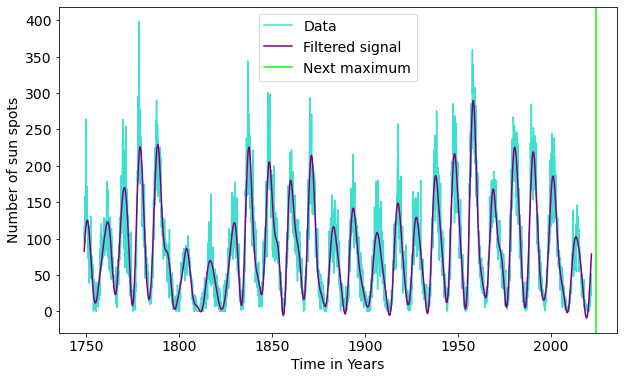

In [19]:
plt.plot(df['MidMonth'], df['NoSpots'], color = 'turquoise', label = 'Data')
plt.plot(df['MidMonth'], ynew2, color = 'purple', label = 'Filtered signal')
plt.xlabel('Time in Years')
plt.ylabel('Number of sun spots')
plt.axvline(x = nextmax, color = 'Lime', label = 'Next maximum')
plt.legend();